LightGBM (Light Gradient Boosting Machine) 설명

LightGBM은 Microsoft에서 개발한 그래디언트 부스팅 기반의 머신러닝 모델

대규모 데이터셋에 대해 빠른 학습 속도와 높은 성능을 제공합니다.

{주요 특징}

빠른 학습 속도: 기존의 그래디언트 부스팅 모델보다 더 빠른 속도로 학습을 수행할 수 있습니다.
    
대규모 데이터셋 처리: 대규모 데이터셋에 효율적이며, 메모리 사용이 적습니다.

하이퍼파라미터 튜닝: 다양한 하이퍼파라미터를 제공하여 성능 최적화가 용이합니다.

범주형 변수 처리: LightGBM은 범주형 변수를 처리하는 데 매우 효율적입니다.
    
병렬 처리: 병렬 처리 및 GPU를 사용하여 더 빠른 계산을 수행할 수 있습니다.
    
LightGBM의 주요 특징:
    
Leaf-wise tree growth: LightGBM은 트리를 생성할 때 leaf-wise 방식으로 성장시켜 더 깊은 트리를 생성하여 성능을 향상시킵니다.
    
Histogram-based method: 데이터를 이산화하여 히스토그램을 기반으로 트리를 구성하므로 메모리 사용량이 적습니다.
    
대규모 데이터에서 높은 성능을 보입니다.

In [ ]:
# 코드 설명:
# LightGBM 모델 생성:

# lgb.LGBMClassifier는 분류 문제를 해결하는 LightGBM 모델입니다. 하이퍼파라미터 n_estimators=100 (트리의 개수)을 설정하여 모델을 생성합니다.
# 모델 학습:

# fit() 함수로 훈련 데이터를 사용하여 모델을 학습시킵니다.
# 예측:

# predict() 함수를 사용하여 테스트 데이터에 대한 예측을 수행합니다.
# 정확도 평가:

# accuracy_score(y_test, lgb_y_pred)를 사용하여 정확도를 평가합니다.
# 혼동 행렬 (Confusion Matrix):

# confusion_matrix(y_test, lgb_y_pred)를 사용하여 실제 클래스와 예측 클래스의 관계를 시각화합니다.
# **seaborn.heatmap**을 사용하여 혼동 행렬을 히트맵 형식으로 시각화합니다.
# 특성 중요도 (Feature Importance):

# feature_importances_를 사용하여 각 특성이 예측에 얼마나 중요한지 평가하고, 수평 바 차트로 시각화합니다.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

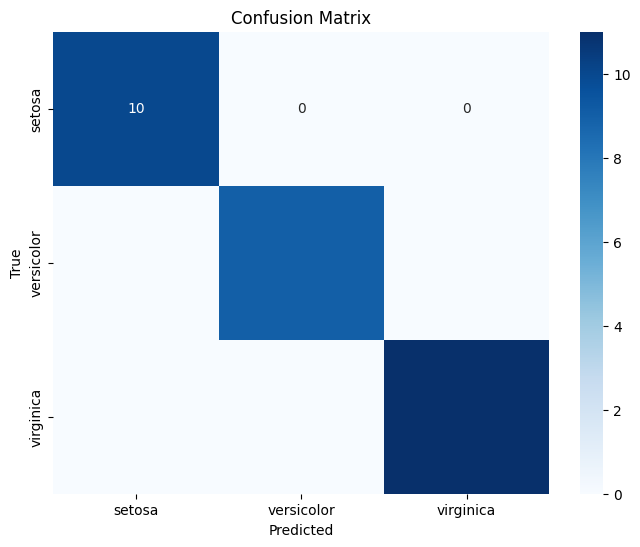

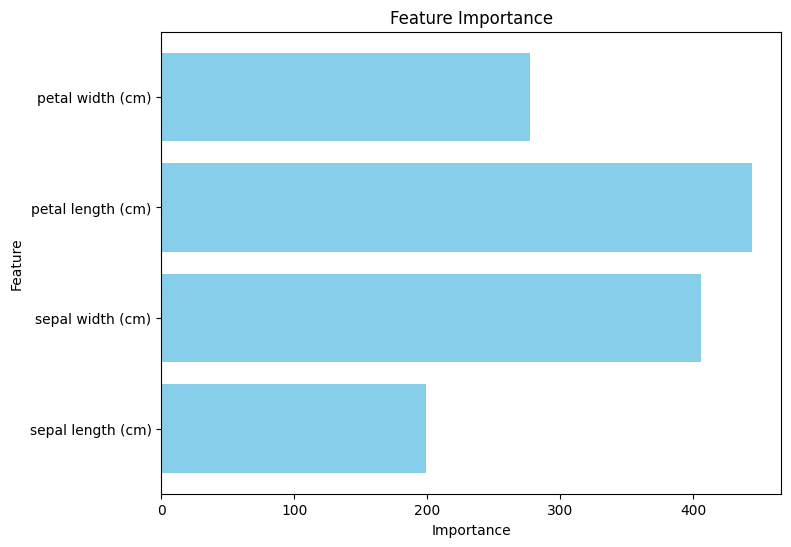

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb

# 예시 데이터셋: 붓꽃(Iris) 데이터셋
iris = load_iris()
X = iris.data  # 특성 (Features)
y = iris.target  # 레이블 (Labels)

# 훈련용 데이터와 테스트용 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# 모델 학습
lgb_model.fit(X_train, y_train)

# 테스트 데이터로 예측
lgb_y_pred = lgb_model.predict(X_test)

# 정확도 평가
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
print(f"LightGBM 모델 정확도: {lgb_accuracy * 100:.2f}%")

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, lgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 특성 중요도 시각화
feature_importances = lgb_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


출력:
정확도: LightGBM 모델의 예측 정확도가 출력됩니다.

혼동 행렬: 예측된 값과 실제 값 간의 관계를 나타내는 혼동 행렬이 시각화됩니다.

특성 중요도: 각 특성의 중요도를 나타내는 수평 바 차트를 시각화합니다.

LightGBM의 장점:

빠른 학습 속도: XGBoost보다 더 빠른 학습 속도를 제공합니다.

대규모 데이터셋 처리: 대규모 데이터셋에서도 뛰어난 성능을 발휘합니다.

병렬 처리: 데이터를 여러 처리 단위로 나누어 병렬로 학습하여 성능을 높입니다.

기술적 최적화: 범주형 변수를 처리하는 데 뛰어난 성능을 보이며, 메모리 사용이 효율적입니다.